In [ ]:
%pip install statsmodels

c:\Users\Martinmark\Desktop\Repos\eda\roller_coaster\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Martinmark\Desktop\Repos\eda\roller_coaster\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Martinmark\Desktop\Repos\eda\roller_coaster\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


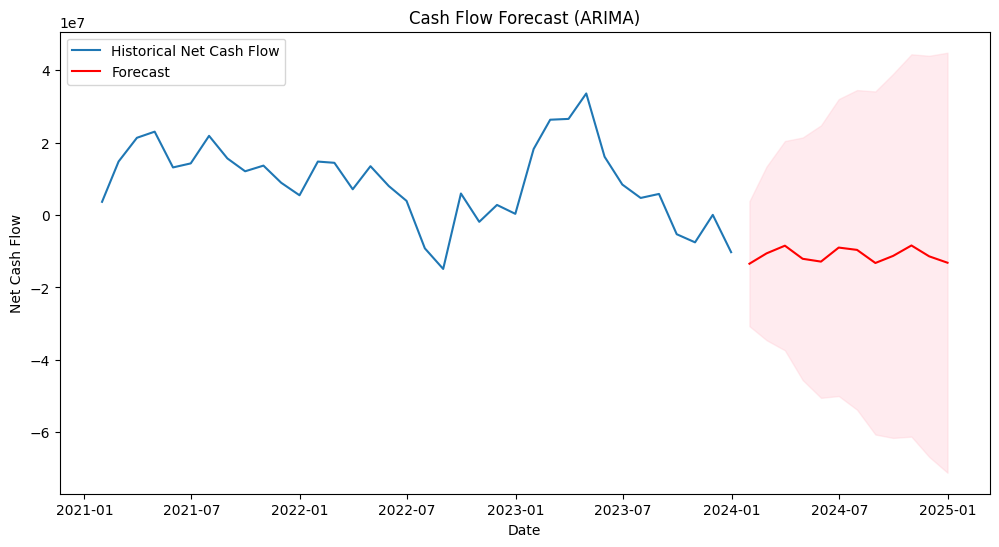

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# ---------------------------
# 1. Create synthetic dataset
# ---------------------------
np.random.seed(42)
n_months = 36
dates = pd.date_range(start="2021-01-01", periods=n_months, freq="ME")

base_inflows = 100_000_000
base_outflows = 90_000_000

inflows = base_inflows + 10_000_000 * np.sin(np.linspace(0, 6*np.pi, n_months)) \
          + np.random.normal(0, 5_000_000, n_months)

outflows = base_outflows + 8_000_000 * np.cos(np.linspace(0, 4*np.pi, n_months)) \
           + np.random.normal(0, 4_000_000, n_months)

cash_data = pd.DataFrame({
    "Date": dates,
    "Net_Cash_Flow": (inflows - outflows).astype(int)
}).set_index("Date")

series = cash_data["Net_Cash_Flow"]

# ---------------------------
# 2. Fit ARIMA model
# ---------------------------
model = ARIMA(series, order=(2,1,2))
model_fit = model.fit()

# ---------------------------
# 3. Forecast
# ---------------------------
forecast = model_fit.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean

# Backward-compatible confidence intervals
try:
    forecast_ci = forecast.conf_int()
except AttributeError:
    se = forecast.se_mean
    lower = forecast_mean - 1.96 * se
    upper = forecast_mean + 1.96 * se
    forecast_ci = pd.DataFrame({"lower": lower, "upper": upper})

# ---------------------------
# 4. Plot
# ---------------------------
plt.figure(figsize=(12,6))
plt.plot(series.index, series.values, label="Historical Net Cash Flow")
plt.plot(forecast_mean.index, forecast_mean.values, label="Forecast", color="red")
plt.fill_between(forecast_mean.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1],
                 color="pink", alpha=0.3)
plt.title("Cash Flow Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Net Cash Flow")
plt.legend()
plt.show()


In [ ]:
import caas_jupyter_tools
caas_jupyter_tools.display_dataframe_to_user("Treasury Cash Flow Dataset", cash_data)